# 导入torch包

In [4]:
import torch

# 张量 or 数组

In [5]:
x = torch.arange(6) # 构建一个0到5的一维数组
x = x.reshape(2, 3)#将数组改成2行3列的二维数组
y= torch.tensor([[1,2,3],[4,5,6]])# 创建一个二维数组
x+y, x-y, x*y, x/y, x**y #按元素做加法，减法，乘法，除法，幂运算

(tensor([[ 1,  3,  5],
         [ 7,  9, 11]]),
 tensor([[-1, -1, -1],
         [-1, -1, -1]]),
 tensor([[ 0,  2,  6],
         [12, 20, 30]]),
 tensor([[0.0000, 0.5000, 0.6667],
         [0.7500, 0.8000, 0.8333]]),
 tensor([[    0,     1,     8],
         [   81,  1024, 15625]]))

### 张量运算中注意广播效应

In [6]:
a = torch.arange(3).reshape(3,1)
b = torch.arange(2).reshape(1,2)
print(a,"\n",b)
a+b #会构成一个矩阵

tensor([[0],
        [1],
        [2]]) 
 tensor([[0, 1]])


tensor([[0, 1],
        [1, 2],
        [2, 3]])

### python中的指针：id

In [7]:
Y = 1
before = id(Y)
Y = Y + x
id(Y) == before # Y=Y+X操作后新的Y地址改变了，不等于原地址

False

In [8]:
# 原地操作
x = torch.tensor([1,2])
print(id(x))
y = torch.zeros_like(x)
z = torch.zeros_like(x)
print(id(z))
x += y # 地址不变
z[:] = x+y # 地址不变 
print(id(x))
print(id(z))

2958350952688
2958335707488
2958350952688
2958335707488


In [17]:
"""tensor维度问题"""
a = torch.tensor([[[1,2,3],
                   [2,3,4],],
                 [[3,4,5],
                 [4,5,6]]]
                )# 2,2,3
print(a[0].max(dim = 1))#第一个通道每行最大
print(a.max(dim = 0).values)# 最大的通道
print(a.max(dim = 1).values)# 每列最大
print(a.max(dim = 2).values)#每行最大

torch.return_types.max(
values=tensor([3, 4]),
indices=tensor([2, 2]))
tensor([[3, 4, 5],
        [4, 5, 6]])
tensor([[2, 3, 4],
        [4, 5, 6]])
tensor([[3, 4],
        [5, 6]])


# 线性代数部分

### 矩阵乘法

In [19]:
a = torch.ones(3,4,dtype = torch.int)
b = torch.IntTensor([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
torch.mm(a,b) # 矩阵乘法

tensor([[10, 14, 18],
        [10, 14, 18],
        [10, 14, 18]], dtype=torch.int32)

### 范数

In [20]:
u = torch.tensor([1.0,2.0,3.0])
torch.norm(u)#二范数

tensor(3.7417)

In [21]:
torch.abs(u).sum()#一范数

tensor(6.)

In [22]:
torch.norm(torch.ones(4,9))#Frobenius norm 矩阵元素平方和

tensor(6.)

# 自动求导

## 显式构造

In [23]:
x = torch.arange(4.0)
x.requires_grad_(True) # 默认None不需要梯度
y = 2 * torch.dot(x, x)
print(y)

y.backward()# 反向求导
print(x.grad)

x.grad.zero_()#梯度会自动累加，需要清空
y = x.sum()
y.backward()
print(x.grad)

x.grad.zero_()
y = x * x
u = y.detach() # 将y视为常数而不是x的函数
z = u * x
z.sum().backward()
print(x.grad == u)#z对x求导为u

tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])
tensor([1., 1., 1., 1.])
tensor([True, True, True, True])


## 隐式构造

In [24]:
def f(a):
    b = torch.dot(a,a)
    return b

a = torch.randn(size = (4,), requires_grad=True)
c = f(a)
c.backward()
print(a.grad)

tensor([ 4.3232, -0.3006,  1.2986,  3.1083])


# 线性回归

## 构造数据集

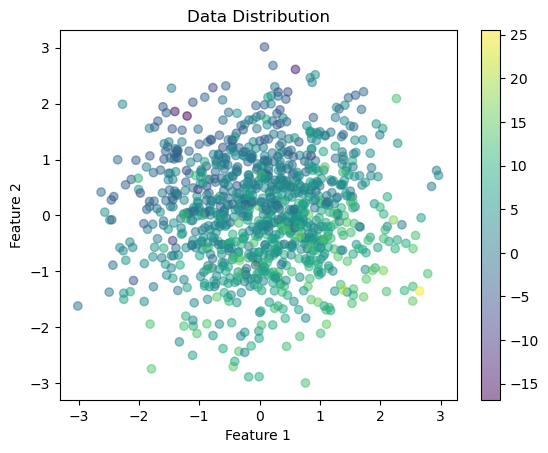

In [25]:
"""构造数据集"""
import random
import torch
def synsetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))#生成一个形状为(num_examples, len(w))的随机正态分布数据（均值为0，标准差为1）作为特征矩阵x
    y = torch.matmul(x,w) + b#计算模型的输出，即特征矩阵x与权重向量w的矩阵乘法，再加上偏置项b。
    y += torch.normal(0, 0.01, y.shape)#在模型输出y上添加一些噪声，噪声是正态分布的，均值为0，标准差为0.01。
    return x,y.reshape((-1,1))#返回特征矩阵x和标签向量y，其中y被重新塑形为二维张量，每行一个标签
true_w = torch.tensor([2,-3,4],dtype=torch.float32)
true_b = 4.2
features, labels = synsetic_data(true_w,true_b,1000)

"""数据可视化"""
import matplotlib.pyplot as plt
# 如果你想要绘制整个数据集的分布情况，你可以使用以下代码：
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.5)
# cmap是颜色，'viridis': 从黄到蓝的渐变 alpha是透明度
plt.colorbar()  # 显示颜色条
plt.title('Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 简洁实现

In [65]:
"""构造数据集"""
import random
import torch
def synsetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))#生成一个形状为(num_examples, len(w))的随机正态分布数据（均值为0，标准差为1）作为特征矩阵x
    y = torch.matmul(x,w) + b#计算模型的输出，即特征矩阵x与权重向量w的矩阵乘法，再加上偏置项b。
    y += torch.normal(0, 0.01, y.shape)#在模型输出y上添加一些噪声，噪声是正态分布的，均值为0，标准差为0.01。
    return x,y.reshape((-1,1))#返回特征矩阵x和标签向量y，其中y被重新塑形为二维张量，每行一个标签
true_w = torch.tensor([2,-3,4],dtype=torch.float32)
true_b = 4.2
features, labels = synsetic_data(true_w,true_b,1000)
"""通过框架中现有API读取数据"""
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.2738, -0.3570, -1.7646],
         [-1.7806,  0.8068,  0.0156],
         [-1.0853,  0.9032, -1.1808],
         [ 1.5915,  0.2170, -0.7944],
         [ 0.2544, -0.2118, -0.5879],
         [-1.3227,  0.4523, -0.9336],
         [ 0.8904,  1.0199, -0.3495],
         [ 1.2411, -1.3079,  0.0471],
         [-0.4802,  0.2258, -0.3389],
         [ 0.2037, -1.3274, -1.0558]]),
 tensor([[-1.2352],
         [-1.6981],
         [-5.4249],
         [ 3.5504],
         [ 2.9894],
         [-3.5274],
         [ 1.5281],
         [10.8168],
         [ 1.2205],
         [ 4.3724]])]

In [66]:
from torch import nn
net = nn.Sequential(nn.Linear(3,1))#创建了一个神经网络模型net，它由一个序列化的模块列表组成，其中只有一个模块，即一个nn.Linear层。这个nn.Linear层接受输入特征维度为3的向量，并将其转换为输出特征维度为1的向量。
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [67]:
loss = nn.MSELoss()# 计算均方误差的类，也就是L2范数
trainer = torch.optim.SGD(net.parameters(),lr=0.3) #这行代码使用了PyTorch的优化器torch.optim.SGD，即随机梯度下降（Stochastic Gradient Descent）优化器，来优化神经网络模型net的参数。下面是代码中各个部分的含义：
#torch.optim.SGD: PyTorch中的随机梯度下降优化器，是一种常用的优化算法，用于调整模型参数以最小化损失函数。
#net.parameters(): 这是一个PyTorch模型的方法，它返回模型中所有需要优化的参数。对于nn.Sequential模型，这通常包括所有层的权重和偏置。
#lr=0.3: 这是学习率参数，它决定了在每次迭代中更新模型参数时步长的大小。在这个例子中，学习率被设置为0.3。学习率是优化过程中的关键参数，它影响着优化的效率和收敛性。
#trainer: 这是一个变量，用来存储创建的优化器实例。在训练过程中，你会使用这个优化器来执行参数的更新。

#传输的net.parameters()中有grad()的信息, 要是torch.tensor的parameters才有grad()信息

"""开始训练"""
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

epoch 1, loss 0.000108
epoch 2, loss 0.000108
epoch 3, loss 0.000101
w的估计误差： tensor([ 0.0014, -0.0012, -0.0006])
b的估计误差： tensor([-0.0011])


# Softmax回归
实际是分类方法不是回归

## 损失函数 
1. 均方损失MESLoss L2 loss     $$l(y,y')=\frac{1}{2}(y-y')^2$$
2. 绝对值损失函数 L1 loss     $$l(y,y')=|y-y'|-\frac{1}{2}$$
3. Huber’s Robust Loss 当预测值和真值差的绝对值大于1时用绝对值损失函数，否则用均方损失
        $$ l(y,y')=\left\{
        \begin{array}{rcl}
            |y-y'|-\frac{1}{2} & & |y-y'|>1 \\
            \frac{1}{2}(y-y')^2 & & otherwise\\
        \end{array} \right. $$ 
4. 交叉熵损失函数  $$l(y,y')=-\sum_{k}y_k log(y'_k)$$
    y_k中只有正确解标签的索引为1，其他均为0. 因此，对每一个样本，只要输出正确索引对应的的$-logy'_k$

In [7]:
import numpy as np
def cross_entropy(y_hat, y):
    """交叉熵函数"""
    return - np.log(y_hat[range(len(y_hat)), y]) # 只有真确的标签对应的索引为1.


## 图像分类数据集

In [8]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

#ToTensor将图片从PIL转为32位浮点
#并除以255使得像素的数值在0到1之间
# FashionMnist 的每张图都为28 * 28=784的大小
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='E:/study/DeepLearning/data',train=True,download=True,transform=trans)
mnist_test = torchvision.datasets.FashionMNIST(root='E:/study/DeepLearning/data',train=False,download=True,transform=trans)
print(len(mnist_train))
print(len(mnist_test))

60000
10000


In [9]:
print(mnist_train[0][0].shape)

torch.Size([1, 28, 28])


In [10]:
import matplotlib.pyplot as plt

def get_fashion_mnist_labels(labels):# labels是要展示的标签的标号
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

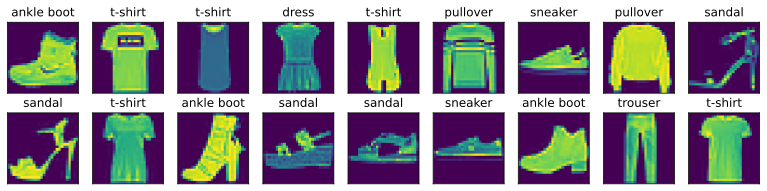

In [11]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))# 把数据放在DataLoader里可以拿到大小为18的数据batch
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [12]:
import time
batch_size = 256
def get_dataloader_workers():
    '''4进程读取数据'''
    return 4

time_start = time.time()
train_iter = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers = get_dataloader_workers())
for X,y in train_iter:
    continue
time_end = time.time()
print(f'{time_end - time_start:.2f} sec')

4.48 sec


## 简洁实现

### torch库搭建网络

In [6]:
def get_dataloader_workers():
    return 4
def load_data_fashion_mnist(batch_size, resize=None): 
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()] # 初始化一个转换列表，其中包含一个将图像转换为PyTorch张量的操作。
    if resize:
        trans.insert(0, transforms.Resize(resize)) # 将一个调整图像大小的转换操作添加到列表的开头。
    trans = transforms.Compose(trans)# 将转换列表组合成一个单一的转换操作。
    mnist_train = torchvision.datasets.FashionMNIST(root='E:/study/DeepLearning/data',train=True,download=True,transform=trans)
    mnist_test = torchvision.datasets.FashionMNIST(root='E:/study/DeepLearning/data',train=False,download=True,transform=trans)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [7]:
import torch
from torch import nn
batch_size=256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [8]:
#torch不会隐式调整输入形状，所以先加一层展平层Flatten()，把输入变成1*784的向量（一个图有784个像素）
net = nn.Sequential(nn.Flatten(), nn.Linear(784,10))#定义一个两层网络的实例net
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)# 如果是线性层就将权重初始化为标准差为0.01的正态分布

net.apply(init_weights)# 将初始化权重方法应用于nn的每一层

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [9]:
loss = nn.CrossEntropyLoss(reduction='none')# reduction设为none代表不会对损失进行任何形式的归约。
# 如果用默认值mean，损失函数会将所有样本的损失求平均，返回一个标量值。

In [10]:
trainer = torch.optim.SGD(net.parameters(),lr=0.1)#使用学习率为0.1的小批量随机梯度下降作为优化算法

### 自定义训练函数

In [11]:
from IPython import display
from d2l import torch as d2l

In [12]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = (y_hat.to(y.dtype) == y)
    return float(cmp.sum())

def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [13]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
        

In [16]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    train_loss_ = []
    train_acc_ = []
    test_ = []
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)

        train_loss_.append(train_metrics[0])
        train_acc_.append(train_metrics[1])
        test_.append(test_acc)
        animator.add(epoch + 1, train_metrics + (test_acc,))

    train_loss, train_acc = train_metrics
    fig, ax = plt.subplot()
    ax.plot(range(len(train_loss_)),train_loss_, label = 'train loss')
    ax.plot(range(len(train_acc_)),train_acc_, label = 'train accuracy')
    ax.plot(range(len(test_)), test_, label='test accurcy')
    plt.legend()
    plt.grid()
    plt.show()
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

### 训练

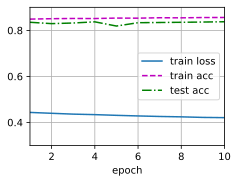

In [17]:
import self_d2l
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 感知机

## 简洁实现

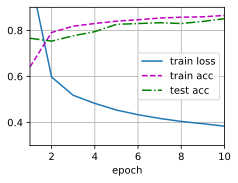

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
import torchvision
import self_d2l as self

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = self.load_data_fashion_mnist(256)

self.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 模型选择、欠拟合和过拟合

### 多项式回归
用三阶多项式生成测试数据 $$y=5+1.2x-3.4\frac{x^2}{2!}+5.6\frac{x^3}{3!}+\epsilon$$where $\epsilon\sim N(0,0.1^2)$

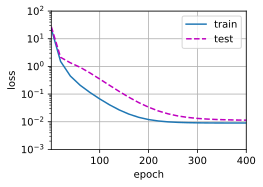

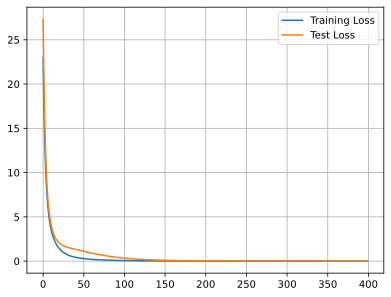

weight: [[ 4.9947124  1.2189921 -3.401987   5.5483117]]


In [2]:
"""构造数据集"""
%matplotlib inline # 用于jupyter显示图像
import math
import numpy as np
import torch
from torch import nn
import self_d2l
from d2l import torch as d2l
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
torch.float32) for x in [true_w, features, poly_features, labels]]

print(features[:2], poly_features[:2, :], labels[:2])


def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]


def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    train_ = []
    test_ = []
    for epoch in range(num_epochs):
        self_d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        train_.append(evaluate_loss(net, train_iter, loss))
        test_.append(evaluate_loss(net, test_iter, loss))
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    fig, ax = plt.subplots()
    ax.plot(range(len(train_)), train_, label='Training Loss')
    ax.plot(range(len(test_)), test_, label='Test Loss')
    ax.legend()  # 添加图例
    plt.grid()
    plt.show()  # 显示图表
    print('weight:', net[0].weight.data.numpy())
    # 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!

# 正常拟合
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

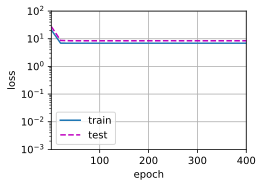

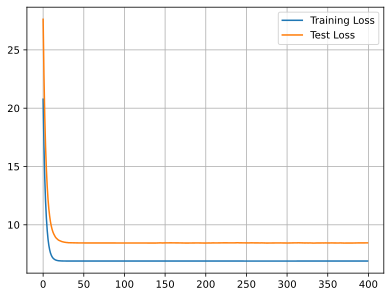

weight: [[3.5795908 3.7744913]]


In [3]:
# 从多项式特征中选择前2个维度，即1和x（欠拟合）
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

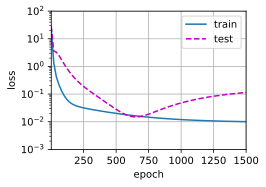

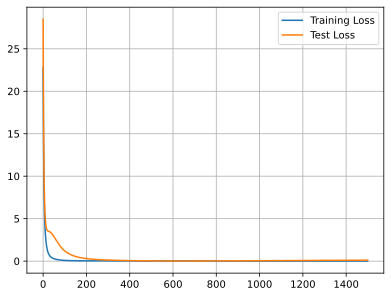

weight: [[ 4.989591    1.2682819  -3.3992867   5.222199    0.0225494   1.0163026
  -0.0155322   0.23887795 -0.09390697 -0.0603152   0.0875483  -0.09563167
   0.19016747 -0.00611642 -0.09442604  0.06373428  0.01780449  0.02959693
   0.20364022  0.1638206 ]]


In [4]:
# 从多项式特征中选取所有维度（过拟合）
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

## 权重衰退
过拟合产生的一大原因是某些项的权重过大，因此，通过惩罚较大的权重可以抑制过拟合。
神经网络的学习目的是减小损失函数的值，如果为损失函数加上权重的平方范数（L2范数），就可以抑制较大的权重。

### 从零实现

In [18]:
"""权重衰退演示"""
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

数据生成公式如下
$$ y = 0.05+\sum_{i=1}^{d} 0.01x_i+\epsilon\ ,\ where \epsilon \sim N(0,0.01^2)$$
为了加强过拟合效果，将数据维数调整到$d=200$，并用一个大小20的小数据集训练

In [19]:
"""数据制造"""
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones(num_inputs,1)*0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [52]:
def init_params():
    w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
    # or w = torch.randn(num_inputs,1 , requires_grad = True) 默认N(0,1^2)正态分布
    b = torch.zeros(1,requires_grad = True)# 一个0
    return [w,b]
def l2_norms_penalty(w): # 二范数惩罚
    return torch.sum(w.pow(2))
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def train(lambd): # lambda是关键字
    w, b = init_params()
    net = lambda X: d2l.linreg(X, w, b)
    num_epochs, lr = 100, 0.003
    train_loss, test_loss = [],[]
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = squared_loss(net(X), y) + lambd * l2_norms_penalty(w) / 2 # 除2是因为求导时能和平方抵消
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            train_loss.append(d2l.evaluate_loss(net, train_iter, squared_loss))
            test_loss.append(d2l.evaluate_loss(net, test_iter, squared_loss))
    fis,ax = plt.subplots()
    ax.plot(range(len(train_loss)), train_loss,label = 'train loss')
    ax.plot(range(len(test_loss)), test_loss, label = 'test loss')
    ax.legend()
    plt.show()
    print('w的L2范数是：', torch.norm(w).item())

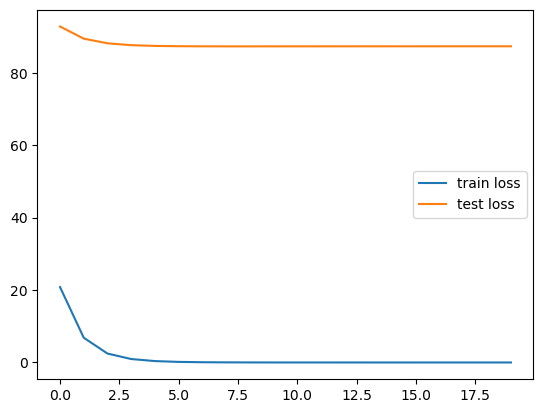

w的L2范数是： 13.464090347290039


In [54]:
train(lambd = 0)# 过拟合

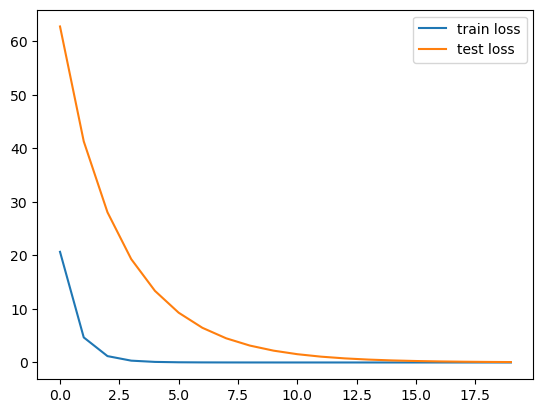

w的L2范数是： 0.33781173825263977


In [55]:
train(lambd=3)

### 简洁实现

In [83]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item()) # item()让输出变为一个数而不是tensor

w的L2范数： 14.835464477539062


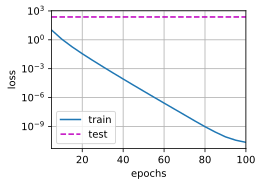

In [84]:
train_concise(0)

w的L2范数： 0.35144680738449097


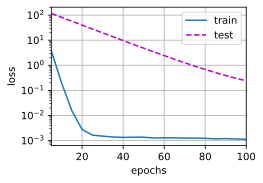

In [87]:
train_concise(3)

## Dropout 暂退法

### 从零开始实现

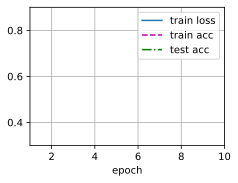

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import self_d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

"""用Fashion mnist 模型"""
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
dropout1, dropout2 = 0.2, 0.5
class Net(nn.Module): # 继承nn.Module
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = self_d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
self_d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 简洁实现

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import self_d2l

dropout1, dropout2 = 0.2, 0.5
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256,256),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(256,10)
                   )
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01) # 初始化m的权重为标准差为0.01的正态分布
net.apply(init_weights);

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.5)
loss = nn.CrossEntropyLoss(reduction='none')
self_d2l.train_ch3(net,train_iter, test_iter, loss, num_epochs, trainer)

## Kaggle房价预测

In [2]:
"""下载数据"""
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
import hashlib
import os
import tarfile
import zipfile
import requests
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'
DATA_HUB['kaggle_house_train'] = (  #@save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')
def download(name, cache_dir='E:/study/DeepLearning/data'):  #@save
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # 命中缓存
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname
def download_extract(name, folder=None):  #@save
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  #@save
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [4]:
"""数据处理"""
#id信息没有用，所以我们将它删除
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))# iloc是用于基于整数位置的索引， 1:-1表示选择从第二列到倒数第二列

In [6]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index # 储存非对象（即数值）特征的索引
# all_features.dtype返回一个padas series，其中包含all_features DataFrame中每列的数据类型
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

# 将所有特征（包括已经填充为0的数值型特征和文本/类别型特征）转换为哑变量（独热编码），并且为缺失值也创建哑变量。
all_features = pd.get_dummies(all_features, dummy_na=True)

n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

In [7]:
"""模型构建"""
loss = nn.MSELoss()
in_features = train_features.shape[1]
def get_net():
    net = nn.Sequential(nn.Linear(in_features, 128), nn.ReLU(), nn.Linear(128,1), nn.ReLU())
    return net
def log_rmse(net, features, labels):
    """衡量的误差变为对数均方根误差"""
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    # log0是负无穷，为了防止该情况出现将下限设为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls
def get_k_fold_data(k, i, X, y):
    """K折交叉验证"""
    assert k > 1
    fold_size = X.shape[0] // k # X.shape[0]整除k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # 使用 slice 函数创建一个索引，用于选择第 j 折的数据。
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k #返回训练和验证误差的平均值

折1，训练log rmse3.235210, 验证log rmse3.888791
折2，训练log rmse3.242644, 验证log rmse4.060383
折3，训练log rmse1.717290, 验证log rmse2.281905
折4，训练log rmse4.057194, 验证log rmse4.546530
折5，训练log rmse2.925671, 验证log rmse3.698816
5-折验证: 平均训练log rmse: 3.035602, 平均验证log rmse: 3.695285


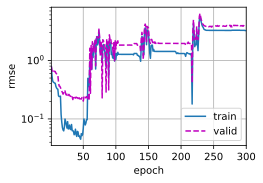

In [16]:
k, num_epochs, lr, weight_decay, batch_size = 5, 300, 2, 0.1, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [17]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse：2.106929


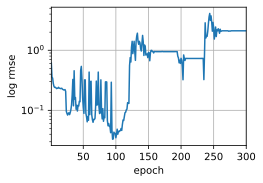

In [19]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)